In [12]:
from Investment import Investment

import pandas as pd

import matplotlib.pyplot as plt

In [13]:
def get_benchmark_accumulated_return(benchmark, sym):

    benchmark['month'] = pd.to_datetime(benchmark['month'], format="%Y-%m-%d")

    benchmark = benchmark[benchmark["sym.2"] == sym]

    accumulated_percent = 1

    for i in range(len(benchmark)):

        accumulated_percent *= (benchmark.iloc[i]['returns.2']/100) + 1

        benchmark.at[benchmark.index[i], 'returns.2'] = (accumulated_percent - 1) * 100

    return benchmark


In [14]:
# ** THIS IS THE ONLY AREA YOU NEED TO CHANGE**

ticker = "ETH" # CHANGE THE CRYPTO YOU WANT TO TEST FROM EITHER OF THE FOLLOWING ("BTC", "ETH")

BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

benchmark = pd.read_csv('benchmark.csv', index_col=0)

benchmark = get_benchmark_accumulated_return(benchmark=benchmark, sym=ticker)

benchmark

,sym.2,month,returns.2
217,ETH,2017-08-01,0.277820
218,ETH,2017-09-01,0.064830
219,ETH,2017-10-01,0.064075
220,ETH,2017-11-01,0.466248
221,ETH,2017-12-01,1.184287
...,...,...,...
293,ETH,2023-12-01,5.192174
294,ETH,2024-01-01,5.192760
295,ETH,2024-02-01,5.679729
296,ETH,2024-03-01,5.776290


In [15]:
strategy = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')

In [16]:
# strategy.daily_inside_candle_strategy_long_win_loss_ratio(end_date="2024-03-31", loss=0.03, ratio=1)

strategy.daily_inside_candle_strategy_long_reference_loss(end_date="2024-03-31")

# strategy.daily_inside_candle_strategy_long_ema_win_loss_ratio(end_date="2024-03-31", loss=0.03, ratio=1, ema=20)

# strategy.daily_inside_candle_strategy_long_short_win_loss_ratio(end_date="2024-03-31", loss=0.06, ratio=8)

# strategy.daily_inside_candle_strategy_long_ema_reference_loss(end_date="2024-03-31", ema=20)

In [17]:
strategy.stockAccount.get_strategy_info()

{'average_return_per_trade': 4.2980646704067125,
 'accumulated_return': 632.2107295300901,
 'win_ratio': 40.845070422535215,
 'max_win': 89.25804529201429,
 'max_loss': -18.55774301283177,
 'total_trade': 71}

In [18]:
strategy.stockAccount.get_transaction() # transactions

[{'ticker': 'ETH/USDT',
  'date': Timestamp('2017-08-28 00:00:00'),
  'price': 348.11,
  'ls': True,
  'buy': True},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-09-03 00:00:00'),
  'price': 343.56,
  'ls': True,
  'buy': False},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-09-19 00:00:00'),
  'price': 296.0,
  'ls': True,
  'buy': True},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-09-22 00:00:00'),
  'price': 258.0,
  'ls': True,
  'buy': False},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-09-26 00:00:00'),
  'price': 294.42,
  'ls': True,
  'buy': True},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-10-23 00:00:00'),
  'price': 293.78,
  'ls': True,
  'buy': False},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-11-10 00:00:00'),
  'price': 318.5,
  'ls': True,
  'buy': True},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-11-11 00:00:00'),
  'price': 293.52,
  'ls': True,
  'buy': False},
 {'ticker': 'ETH/USDT',
  'date': Timestamp('2017-11-15 00:00:0

In [19]:
def pls_visualize(pls):

    columns = ['ticker', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'ls', 'pl', 'pl_percent']
    df = pd.DataFrame(columns=columns)
    for i in pls:
        df.loc[len(df)] = [
            i['ticker'],
            i['buy_date'],
            i['buy_price'],
            i['sell_date'],
            i['sell_price'],
            i['ls'],
            i['pl'],
            i['pl_percent']
        ]

    return df

df_pls = pls_visualize(strategy.stockAccount.get_pls())
df_pls

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,ETH/USDT,2017-08-28,348.11,2017-09-03,343.56,True,-4.55,-1.307058
1,ETH/USDT,2017-09-19,296.00,2017-09-22,258.00,True,-38.00,-12.837838
2,ETH/USDT,2017-09-26,294.42,2017-10-23,293.78,True,-0.64,-0.217377
3,ETH/USDT,2017-11-10,318.50,2017-11-11,293.52,True,-24.98,-7.843014
4,ETH/USDT,2017-11-15,335.60,2017-12-23,635.15,True,299.55,89.258045
...,...,...,...,...,...,...,...,...
66,ETH/USDT,2023-08-09,1856.30,2023-08-17,1807.81,True,-48.49,-2.612186
67,ETH/USDT,2023-10-17,1599.41,2023-12-13,2203.47,True,604.06,37.767677
68,ETH/USDT,2023-12-28,2378.35,2024-01-04,2209.72,True,-168.63,-7.090210
69,ETH/USDT,2024-01-11,2584.37,2024-01-23,2314.19,True,-270.18,-10.454385


In [20]:
accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result = pd.DataFrame(columns=columns)
for i in range(len(df_pls)):
    accumulated_percent *= (df_pls.iloc[i]['pl_percent']/100) + 1
    row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result.loc[len(result.index)] = row

result.insert(2, ticker + "_return", [None for i in range(len(result))], True)

result

,date,pl_percent,ETH_return
0,2017-08-28,-1.307058,None
1,2017-09-19,-13.977098,None
2,2017-09-26,-14.164092,None
3,2017-11-10,-20.896214,None
4,2017-11-15,49.710279,None
...,...,...,...
66,2023-08-09,330.218648,None
67,2023-10-17,492.702237,None
68,2023-12-28,450.678406,None
69,2024-01-11,393.108363,None


In [21]:
for i in range(len(result)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result.at[result.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break
result   
    

,date,pl_percent,ETH_return
0,2017-08-28,-1.307058,27.782021
1,2017-09-19,-13.977098,6.482975
2,2017-09-26,-14.164092,6.482975
3,2017-11-10,-20.896214,46.624823
4,2017-11-15,49.710279,46.624823
...,...,...,...
66,2023-08-09,330.218648,483.099887
67,2023-10-17,492.702237,493.72204
68,2023-12-28,450.678406,519.217388
69,2024-01-11,393.108363,519.27598


([<matplotlib.axis.XTick at 0x7fade09832b0>,
 [Text(17532.0, 0, '2018-01-01'),
  Text(17897.0, 0, '2019-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19358.0, 0, '2023-01-01'),
  Text(19723.0, 0, '2024-01-01')])

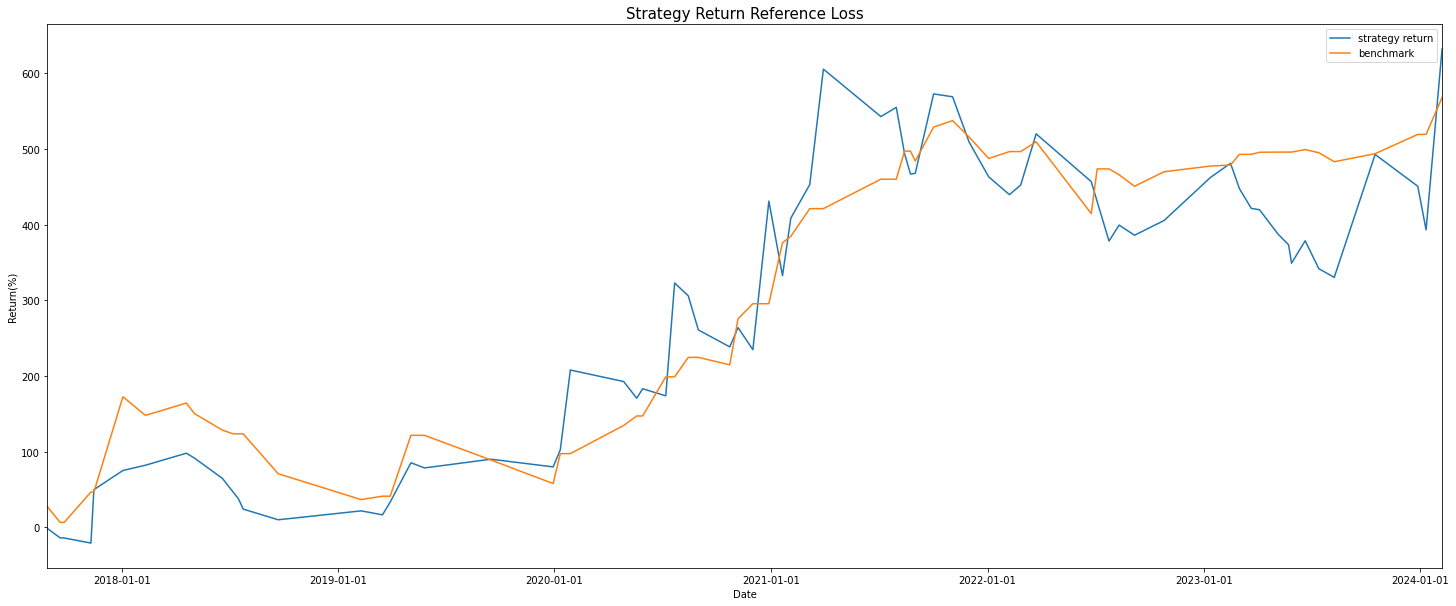

In [22]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result['date'], result['pl_percent'], label="strategy return")
# plt.plot(result.index, result['pl_percent'], label="strategy return")
plt.plot(result['date'], result[ticker + '_return'], label="benchmark")
plt.legend()

plt.xlim(result['date'].min(), result['date'].max())
# plt.xlim(result.index.min(), result.index.max())
ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
plt.xticks(ticks)

In [23]:
# df_pls.tail(50)
# df_pls.head(50)

In [24]:
# x = strategy.file_name
# # x.head(50)
# x = x.loc['2017-10-02': '2024-03-11']
# x.tail(50)

In [25]:
# x = x[x['buyORsell']==1]
# x

In [26]:
# len(x)

In [27]:
# win = 0
# loss = 0
# for i in strategy.stockAccount.get_pls():
#     if i['pl_percent'] > 0:
#         win += 1
#     else:
#         loss += 1

# print(win)
# print(loss)
# print((win / loss) * 100)

- Stoploss
    - +3% -3%
    - 2:1, 3:1...
    - reference loss
- Entry
    - non-technical
    - technical
        - EMA/SMA
- Daily/4-Hourly/Hourly
- Long + short (future)